# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

In [3]:
import pandas as pd
url="https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv"

df=pd.read_csv(url)
df.head(1)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.21696,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.8,Four-Door Car,Medsize,NaN


In [4]:
df.shape

(10910, 26)

In [5]:
df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [6]:
df.columns=df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [7]:
high_claims=df[(df['total_claim_amount'] > 1000) & (df['response'] == 'Yes')]
high_claims

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
189,189,OK31456,California,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,NaN
236,236,YJ16163,Oregon,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,...,0.0,1,Special Auto,Special L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,A
419,419,GW43195,Oregon,25807.063000,Yes,Extended,College,2/13/11,Employed,F,...,1.0,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury Car,Small,A
442,442,IP94270,Arizona,13736.132500,Yes,Premium,Master,2/13/11,Disabled,F,...,0.0,8,Personal Auto,Personal L2,Offer1,Web,1261.319869,SUV,Medsize,A
587,587,FJ28407,California,5619.689084,Yes,Premium,High School or Below,1/26/11,Unemployed,M,...,0.0,1,Personal Auto,Personal L1,Offer2,Web,1027.000029,SUV,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,10351,FN44127,Oregon,3508.569533,Yes,Extended,College,1/5/11,Medical Leave,M,...,1.0,1,Personal Auto,Personal L2,Offer2,Branch,1176.278800,Four-Door Car,Small,NaN
10373,10373,XZ64172,Oregon,10963.957230,Yes,Premium,High School or Below,2/8/11,Employed,M,...,0.0,1,Corporate Auto,Corporate L2,Offer1,Agent,1324.800000,Luxury SUV,Medsize,NaN
10487,10487,IX60941,Oregon,3508.569533,Yes,Extended,College,1/5/11,Medical Leave,M,...,1.0,1,Personal Auto,Personal L3,Offer2,Branch,1176.278800,Four-Door Car,Small,NaN
10565,10565,QO62792,Oregon,7840.165778,Yes,Extended,College,1/14/11,Employed,M,...,2.0,1,Personal Auto,Personal L3,Offer2,Agent,1008.000000,NaN,NaN,NaN


2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [8]:
yes_responses_df= df[df['response']=='Yes']

#avg_claims=yes_responses_df.groupby(['policy_type','gender'])['total_claim_amount'].mean().reset_index()

avg_claims1=yes_responses_df.pivot_table(index='gender', columns='policy_type', values=['total_claim_amount'])
avg_claims1


total_claim_amount                           
policy_type     Corporate Auto Personal Auto Special Auto
gender                                                   
F                   433.738499    452.965929   453.280164
M                   408.582459    457.010178   429.527942

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [9]:
customer_count_by_state_policy = df.groupby(['state', 'policy_type'])['customer'].count().reset_index()
customer_count_by_state_policy.columns = ['state', 'policy_type', 'customer_count']
filtered_states_policy = customer_count_by_state_policy[customer_count_by_state_policy['customer_count'] > 500]
filtered_states_policy

,state,policy_type,customer_count
1,Arizona,Personal Auto,1469
3,California,Corporate Auto,835
4,California,Personal Auto,2594
7,Nevada,Personal Auto,739
9,Oregon,Corporate Auto,592
10,Oregon,Personal Auto,2180
13,Washington,Personal Auto,682


4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [10]:
clv_stats = df.groupby(['education', 'gender'])['customer_lifetime_value'].agg(['max', 'min', 'median'])
clv_stats

max          min       median
education            gender                                       
Bachelor             F       73225.95652  1904.000852  5640.505303
                     M       67907.27050  1898.007675  5548.031892
College              F       61850.18803  1898.683686  5623.611187
                     M       61134.68307  1918.119700  6005.847375
Doctor               F       44856.11397  2395.570000  5332.462694
                     M       32677.34284  2267.604038  5577.669457
High School or Below F       55277.44589  2144.921535  6039.553187
                     M       83325.38119  1940.981221  6286.731006
Master               F       51016.06704  2417.777032  5729.855012
                     M       50568.25912  2272.307310  5579.099207

### Conclusions:

- **Bachelor's degree holders, especially Females**, have the highest potential lifetime values.  
  The **maximum CLV** for **Females with a Bachelor's degree** is `73,225.96`, and their **median CLV** is `5,640.51`, indicating that they are among the most valuable customers in terms of CLV.

- **Males with High School or Below** have the highest **maximum CLV**, which is `83,325.38`, suggesting that there are outliers or a few very high-value customers in this group.  
  Their **median CLV** is `6,286.73`, which is the highest among all gender and education combinations.

- **Doctorate holders** have lower overall CLVs.  
  The **maximum CLV** for **Females with a Doctorate** is `44,856.11`, and the **maximum CLV** for **Males with a Doctorate** is `32,677.34`. Both have relatively lower **median CLV** values (`5,332.46` for Females and `5,577.67` for Males), which might indicate fewer customers or more targeted, less profitable customer segments.

- For most groups, **Females tend to have slightly lower CLVs** compared to **Males**, though this trend isn't universal.  
  For example, the **median CLV** for **Females with a Bachelor's degree** is `5,640.51`, while **Males** in the same group have a **median CLV** of `5,548.03`, showing that **Females** in this category are slightly more valuable on average.

This analysis reveals that **Females with a Bachelor's degree** are among the most valuable segments, and while **Males with High School or Below** have a high maximum CLV, the overall consistency of value is lower across education groups.


## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

In [11]:
pivot_df = df.pivot_table(index='state', columns='months_since_policy_inception', values='number_of_policies', aggfunc='sum', fill_value=0)
pivot_df

months_since_policy_inception,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
state,,,,,,,,,,,,,,,,,,,,,
Arizona,53,44,36,67,43,54,70,27,61,44,...,40,55,47,53,92,33,17,18,34,70
California,189,107,70,114,143,80,92,87,93,143,...,87,50,60,63,70,63,76,50,58,117
Nevada,18,14,24,24,24,14,6,32,51,37,...,34,27,2,43,9,38,12,21,20,15
Oregon,54,99,123,91,67,88,73,88,83,95,...,54,119,97,82,54,57,62,67,50,59
Washington,25,25,39,29,16,15,11,17,21,5,...,55,18,20,26,16,23,19,5,28,19


6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

In [12]:
grouped_df = df.groupby(['state', 'months_since_policy_inception']).size().reset_index(name='number_of_policies')
state_policy_totals = grouped_df.groupby('state')['number_of_policies'].sum().reset_index()
top_states = state_policy_totals.sort_values(by='number_of_policies', ascending=False).head(3)
top_states_list = top_states['state'].tolist()
top_states_df = grouped_df[grouped_df['state'].isin(top_states_list)]

pivot_top_states_df = top_states_df.pivot_table(index='state',  columns='months_since_policy_inception',   values='number_of_policies', aggfunc='sum',  fill_value=0 )
pivot_top_states_df

months_since_policy_inception,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
state,,,,,,,,,,,,,,,,,,,,,
Arizona,16,11,14,28,17,19,19,13,17,19,...,15,20,21,21,26,16,11,9,14,24
California,45,34,27,38,37,32,27,33,33,44,...,28,19,22,27,26,28,26,20,20,32
Oregon,21,27,40,40,27,29,25,25,22,32,...,22,28,30,30,18,17,21,18,13,16


7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [13]:
yes_responses_df = df[df['response'] == 'Yes']


response_rate_df = yes_responses_df.groupby('sales_channel').size() / df.groupby('sales_channel').size() * 100

response_rate_df

sales_channel
Agent          18.005339
Branch         10.787558
Call Center    10.322279
Web            10.885609
dtype: float64

Show DataFrame info.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10279 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

Describe DataFrame.

In [15]:
df.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Show a plot of the total number of responses.

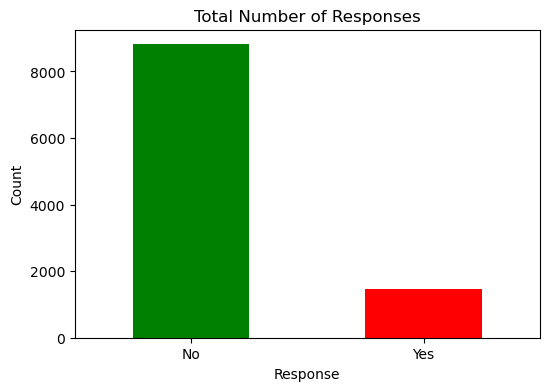

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

response_counts = df['response'].value_counts()
plt.figure(figsize=(6, 4))
response_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Total Number of Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Show a plot of the response rate by the sales channel.

<Figure size 1000x600 with 0 Axes>

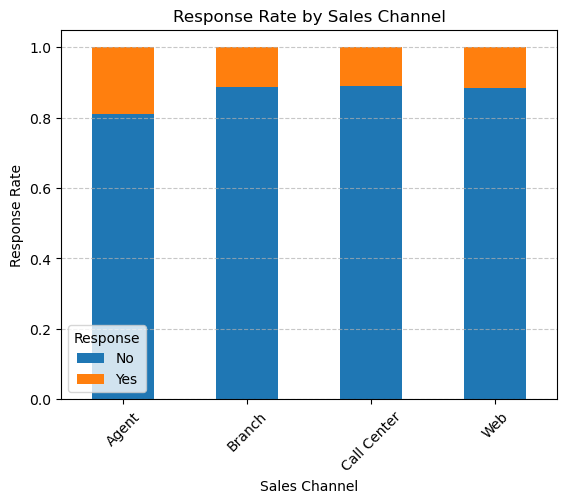

In [28]:
response_rate = df.groupby('sales_channel')['response'].value_counts(normalize=True).unstack()

# Plot response rate
plt.figure(figsize=(10, 6))
response_rate.plot(kind='bar', stacked=True)
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate')
plt.title('Response Rate by Sales Channel')
plt.legend(title='Response',loc='lower left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Show a plot of the response rate by the total claim amount.

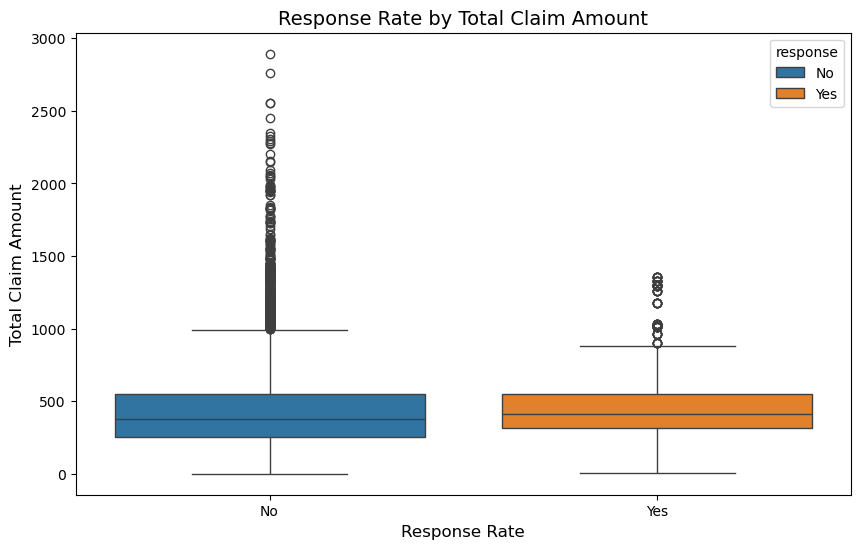

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='response', y='total_claim_amount', data=df, hue='response')

# Adding labels and title
plt.title('Response Rate by Total Claim Amount', fontsize=14)
plt.ylabel('Total Claim Amount', fontsize=12)
plt.xlabel('Response Rate', fontsize=12)



plt.show()

Show a plot of the response rate by income.

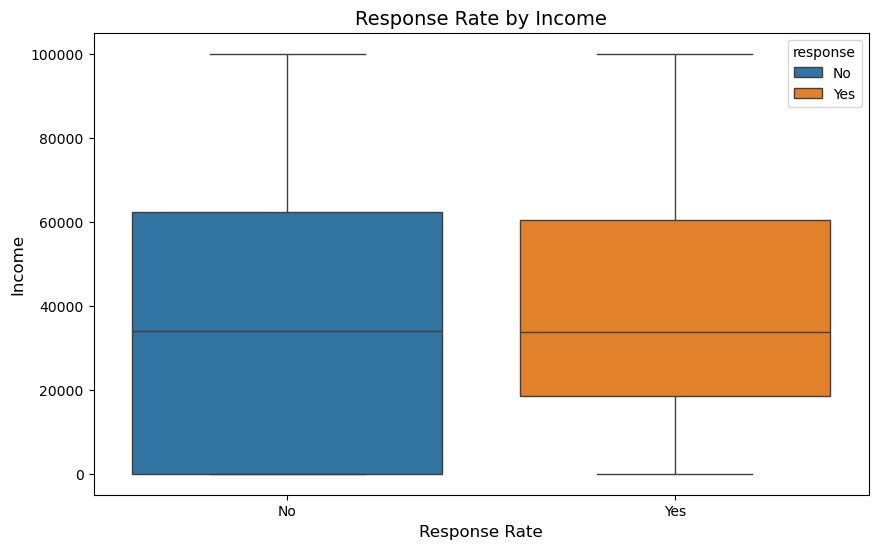

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='response', y='income', data=df, hue='response')

plt.title('Response Rate by Income', fontsize=14)
plt.ylabel('Income', fontsize=12)
plt.xlabel('Response Rate', fontsize=12)

plt.show()
